# IA Aumentada, previsão de atrasos em vôos

[Jupyter do curso no GitHub](https://github.com/alura-cursos/-IA-Aumentada-Prevendo-atrasos-de-voos./blob/aula_04/curso_modelo_atraso_voo.ipynb)

## Import data

In [1]:
import pandas as pd

In [2]:
CSV_URL = 'https://iaaumentada.s3.us-east-2.amazonaws.com/base-dados/flights.csv'

In [3]:
df_dados = pd.read_csv(CSV_URL)
df_dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
df_dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [5]:
df_dados.shape

(71175, 11)

In [6]:
df_dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [7]:
df_dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [8]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


## Exploratoty data analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

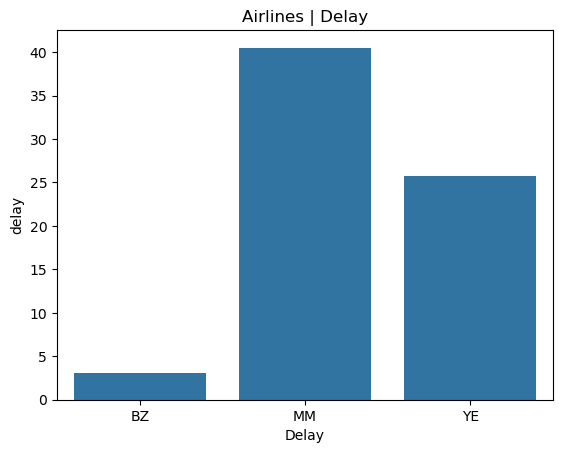

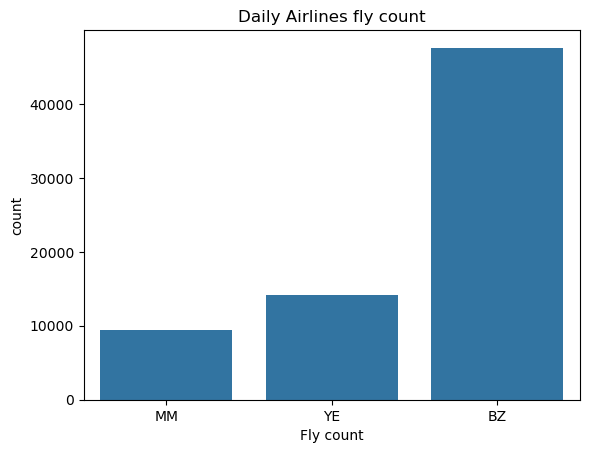

In [10]:
sns.barplot(df_dados.groupby('airline')['delay'].mean().reset_index(),
            x='airline',
            y='delay')
plt.title('Airlines | Delay')
plt.xlabel('Airlines')
plt.xlabel('Delay')
plt.show()

sns.countplot(df_dados, x='airline')
plt.title('Daily Airlines fly count')
plt.xlabel('Airlines')
plt.xlabel('Fly count')
plt.show()

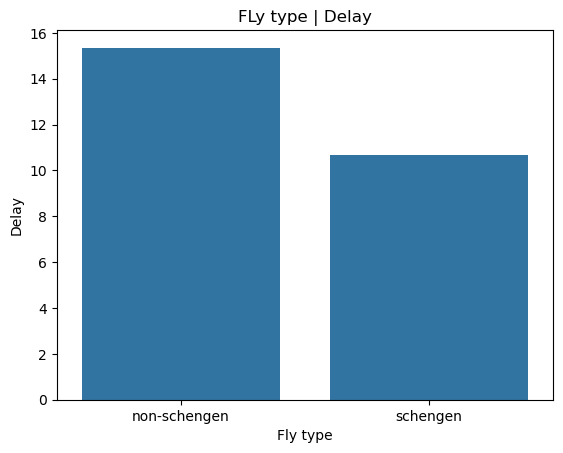

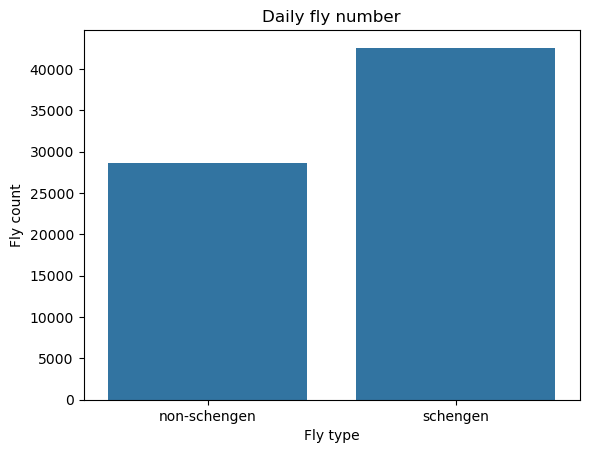

In [11]:
sns.barplot(df_dados.groupby('schengen')['delay'].mean().reset_index(),
            x='schengen',
            y='delay')
plt.title('FLy type | Delay')
plt.xlabel('Fly type')
plt.ylabel('Delay')
plt.show()

sns.countplot(data=df_dados, x='schengen')
plt.title('Daily fly number')
plt.xlabel('Fly type')
plt.ylabel('Fly count')
plt.show()

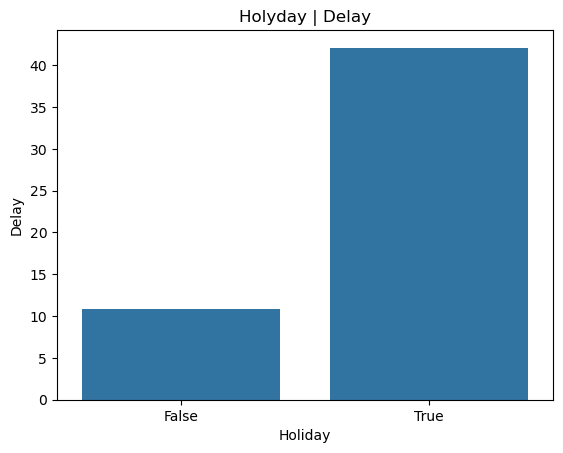

In [12]:
sns.barplot(df_dados.groupby('is_holiday')['delay'].mean().reset_index(),
            x='is_holiday',
            y='delay')
plt.title('Holyday | Delay')
plt.xlabel('Holiday')
plt.ylabel('Delay')
plt.show()


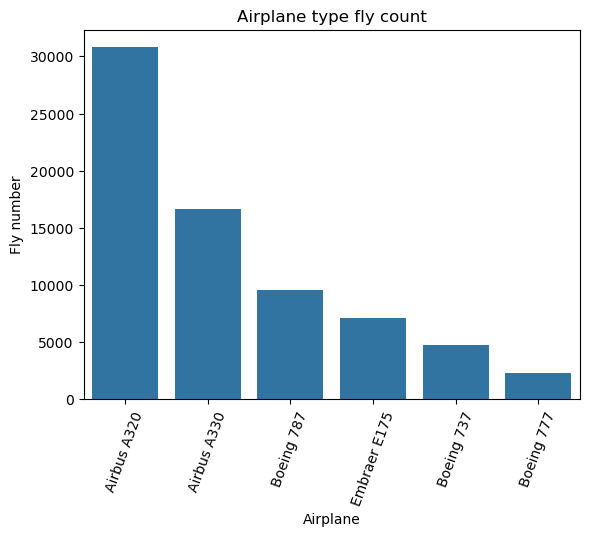

In [13]:
sns.countplot(df_dados,
              x='aircraft_type',
              order=df_dados['aircraft_type'].value_counts().index)
plt.title('Airplane type fly count')
plt.xticks(rotation=70)
plt.xlabel('Airplane')
plt.ylabel('Fly number')
plt.show()


### Bin size formula

W = 2 (IQR) N^-1/3

In [14]:
import numpy as np

In [15]:
def calc_bin_width(df, column):
  q3, q1 = np.percentile(df[column], [75, 25])
  return 2 * (q3 - q1) * np.power(len(df[column]), -1/3)

<Axes: xlabel='arrival_time', ylabel='Count'>

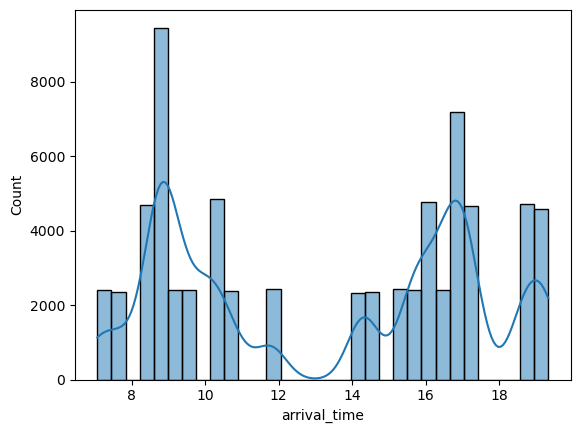

In [16]:
sns.histplot(df_dados,
             x='arrival_time',
             kde=True,
             binwidth=calc_bin_width(df_dados, 'arrival_time'))

<Axes: xlabel='departure_time', ylabel='Count'>

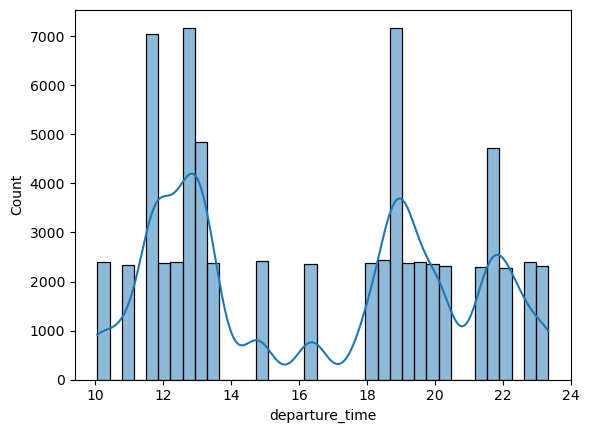

In [17]:
sns.histplot(df_dados,
             x='departure_time',
             kde=True,
             binwidth=calc_bin_width(df_dados, 'departure_time'))

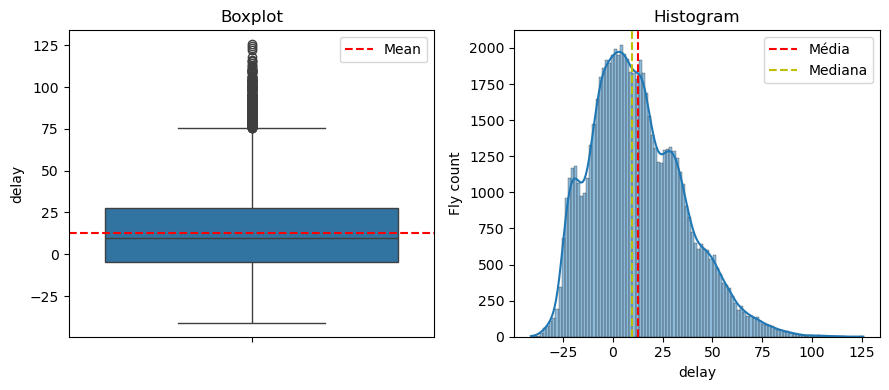

In [18]:
mean_delay = df_dados['delay'].mean()
median_delay = df_dados['delay'].median()

fig, axes = plt.subplots(1, 2,
                         figsize=(9, 4))

sns.boxplot(df_dados,
            y='delay',
            ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay,
                color='r',
                linestyle='--',
                label='Mean')
axes[0].legend()

sns.histplot(df_dados,
             x='delay',
             ax=axes[1],
             kde=True,
             binwidth=calc_bin_width(df_dados, 'delay'))
plt.ylabel('Fly count')
plt.grid(False)
axes[1].set_title('Histogram')

axes[1].axvline(x=mean_delay,
                color='r',
                linestyle='--',
                label='Média')
axes[1].axvline(x=median_delay,
                color='y',
                linestyle='--',
                label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()


## Feature engineering

In [19]:
df_dados['date'] = pd.to_datetime(df_dados['year'].astype(str) + '-' + (df_dados['day'] + 1).astype(str), format='%Y-%j')
df_dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [20]:
df_dados['is_weekend'] = df_dados['date'].dt.weekday.isin([5, 6])
df_dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False


In [21]:
df_dados['day_name'] = df_dados['date'].dt.day_name()
df_dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


## Feature enconding

In [22]:
df_dados.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

In [23]:
df_dados['schengen'] = df_dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
df_dados['is_holiday'] = df_dados['is_holiday'].replace({False: 0, True: 1})
df_dados['is_weekend'] = df_dados['is_weekend'].replace({False: 0, True: 1})
df_dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [24]:
categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_name']

In [25]:
df_encoded = pd.get_dummies(df_dados,
                            columns=categorical_vars,
                            dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


<Axes: >

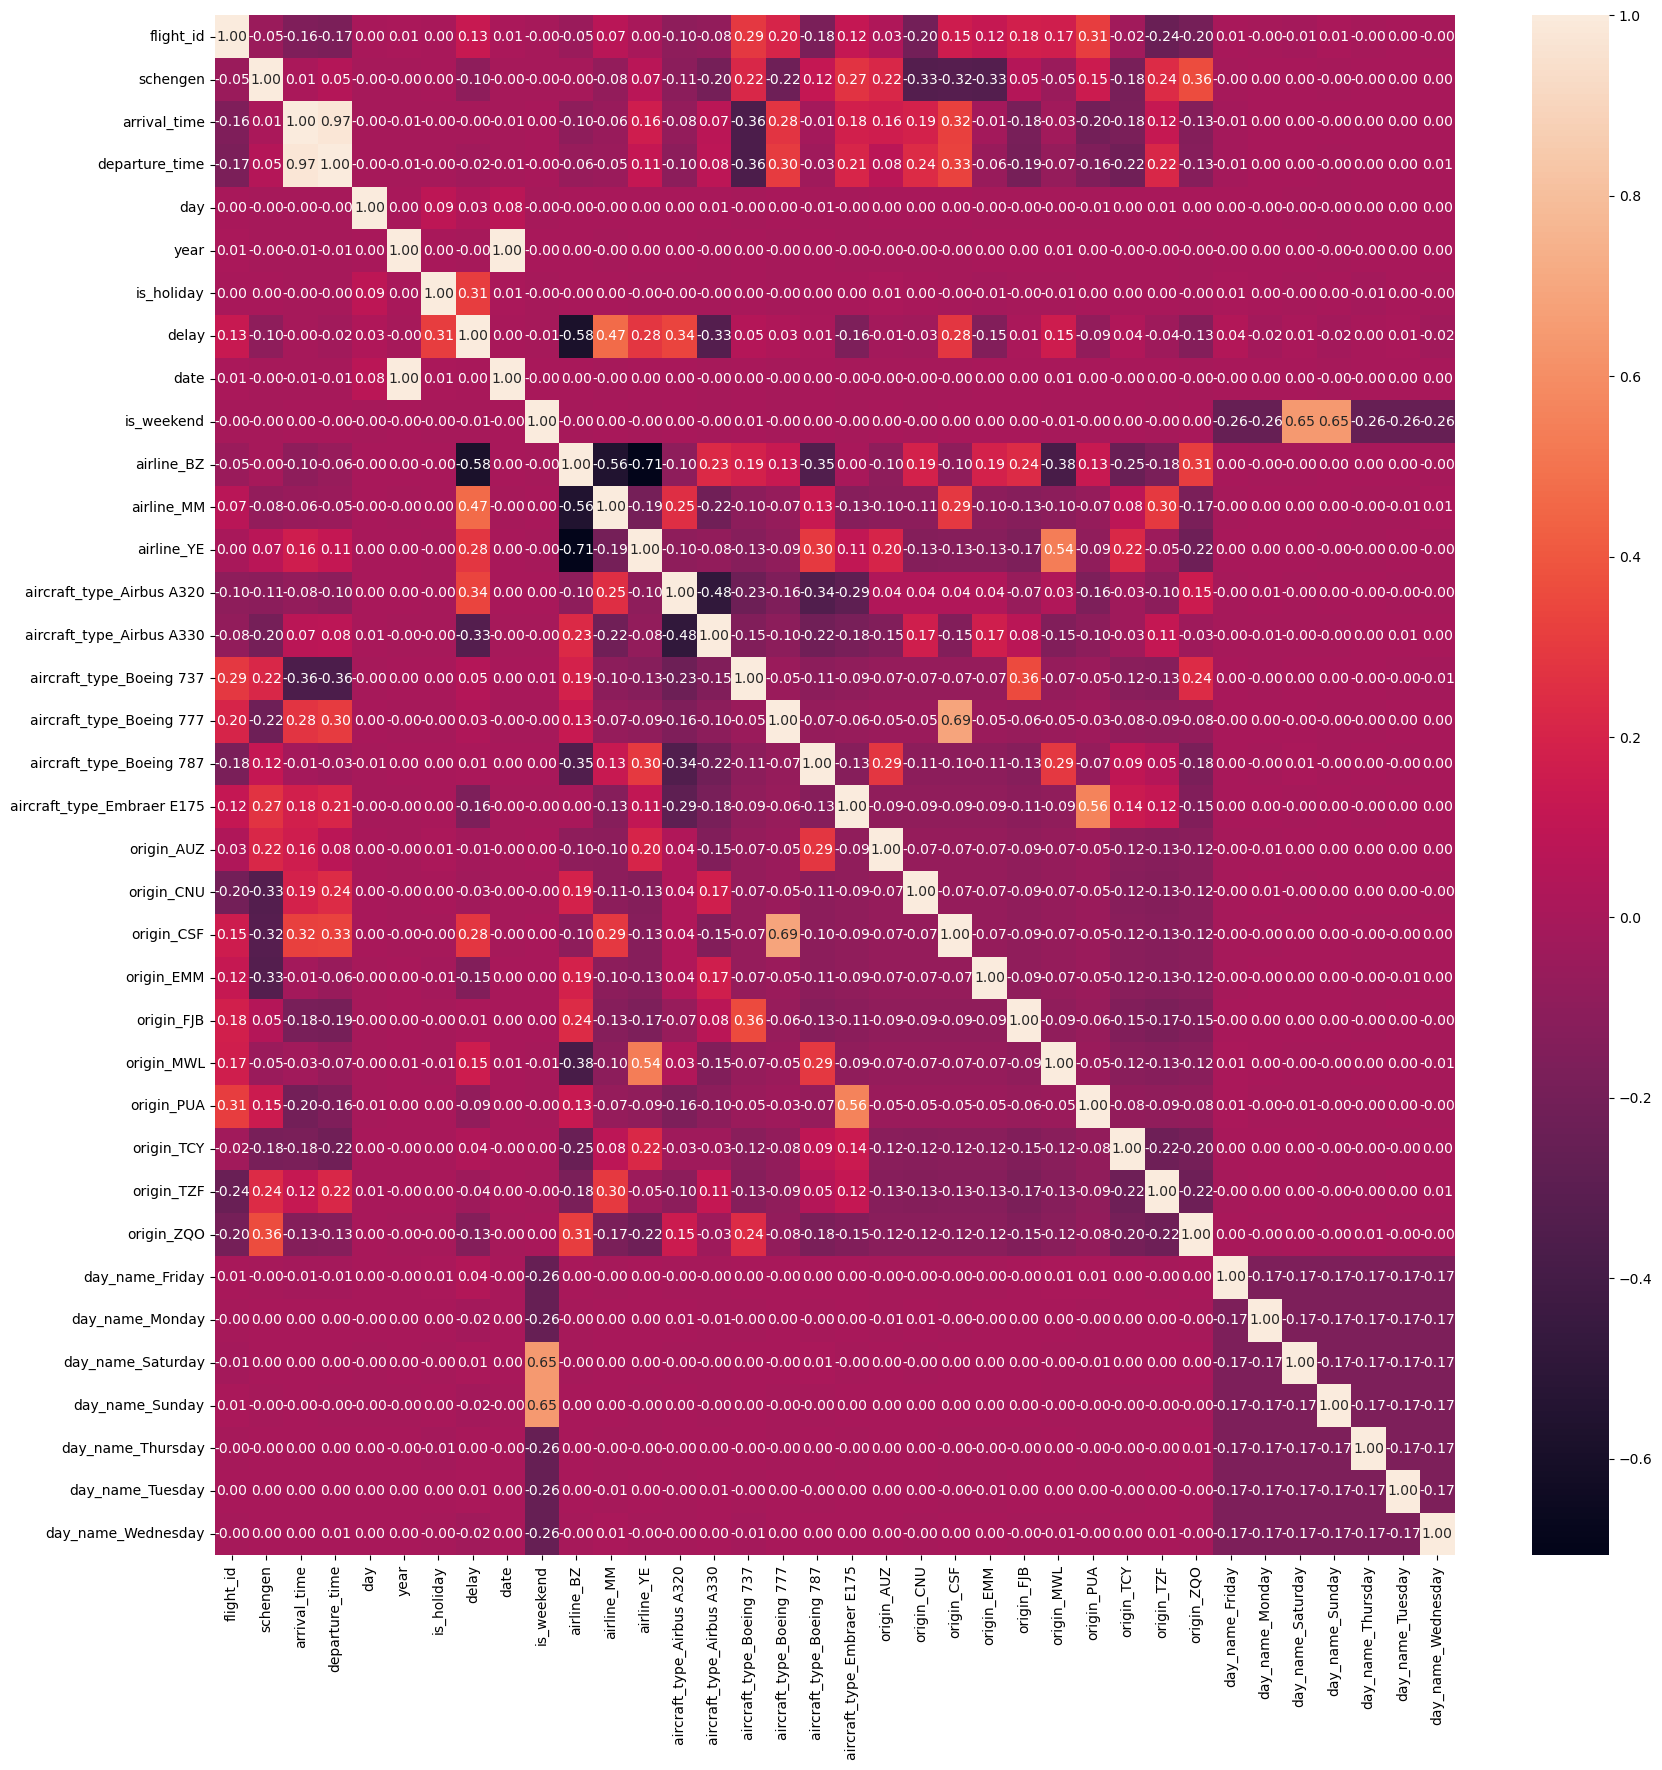

In [26]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_encoded.corr(),
            annot=True,
            fmt='.2f',
            cmap='rocket')

<Axes: >

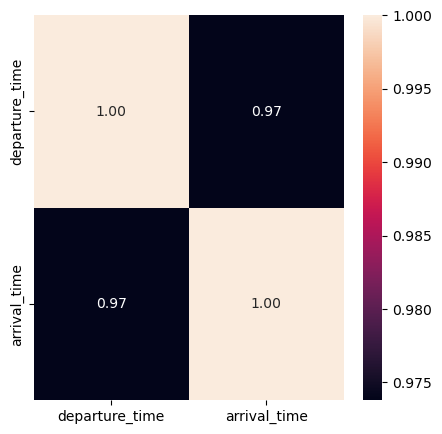

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_encoded[['departure_time', 'arrival_time']].corr(),
            annot=True,
            fmt='.2f',
            cmap='rocket')

In [28]:
extra_drops = ['flight_id', 'day', 'year', 'date']
df_encoded.drop(['departure_time', *extra_drops],
                axis=1,
                inplace=True)
df_encoded.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Model training

### Split data

In [29]:
X, Y = df_encoded.drop('delay', axis=1), df_encoded['delay']

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                        random_state=7)

### Dummy

In [31]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()

In [32]:
model_dummy.fit(x_train, y_train)

DummyRegressor()

In [33]:
y_hat_dummy = model_dummy.predict(x_test)

### Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5,
                                 random_state=7)

In [35]:
model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=7)

In [36]:
y_hat_rf = model_rf.predict(x_test)

## Model avaliation

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
! pip install yellowbrick

In [39]:
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot

In [40]:
def calc_model_metrics(model, y_hat, x_train, x_test, y_train, y_test, ignore_plots=False):
  if not ignore_plots:
    prediction_error(model, x_train, y_train, x_test, y_test)
    residuals_plot(model, x_train, y_train, x_test, y_test)
  return {
      'mean_absolute_error': round(mean_absolute_error(y_test, y_hat), 4),
      'mean_squared_error': round(mean_squared_error(y_test, y_hat, squared=False), 4),
      'r2_score': round(r2_score(y_test, y_hat), 4)
  }

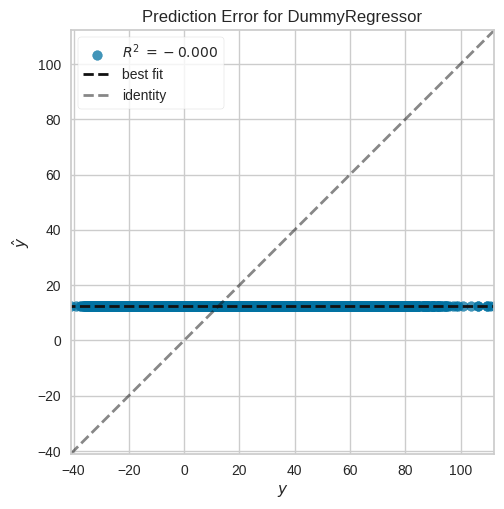

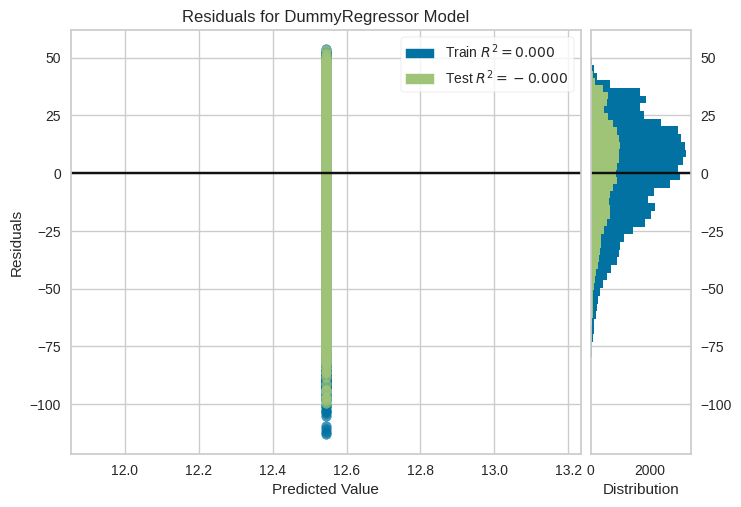

{'mean_absolute_error': 18.6674,
 'mean_squared_error': 23.1885,
 'r2_score': -0.0}

In [41]:
calc_model_metrics(model_dummy, y_hat_dummy, x_train, x_test, y_train, y_test)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


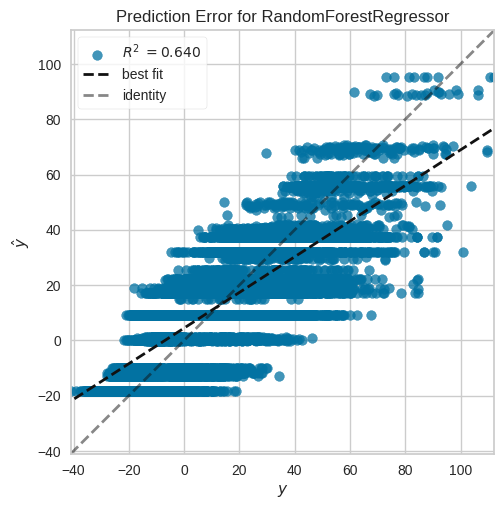

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


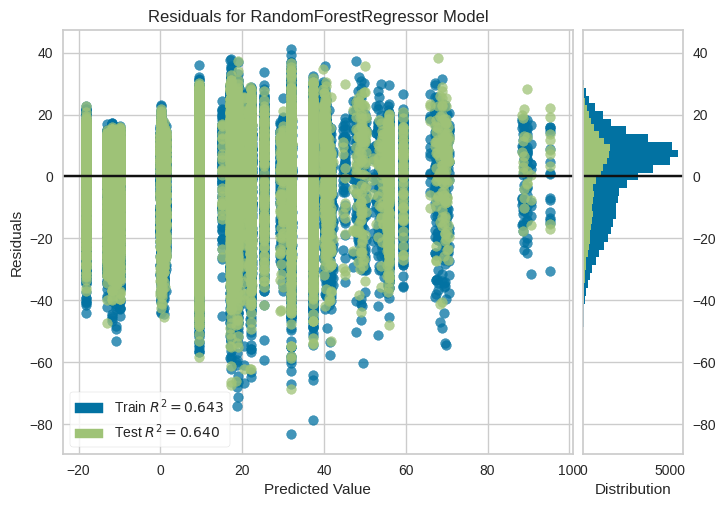

{'mean_absolute_error': 11.1834,
 'mean_squared_error': 13.9068,
 'r2_score': 0.6403}

In [42]:
calc_model_metrics(model_rf, y_hat_rf, x_train, x_test, y_train, y_test)

### Cross validation

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [44]:
cv_result = cross_validate(model_rf,
               x_train, y_train,
               cv=KFold(n_splits=5,
                        shuffle=True,
                        random_state=7),
               scoring={ 'mae': 'neg_mean_absolute_error',
                         'rmse': 'neg_root_mean_squared_error',
                         'r2': 'r2' })

In [45]:
for metric in ['rmse', 'mae', 'r2']:
  scores = cv_result['test_' + metric]
  print(f'[{metric.upper()}]\t Scores: {[round(val, 3) for val in scores]}')
  print('[%s]\t Mean: %.3f' % (metric.upper(), scores.mean()))
  print('[%s]\t Std: %.3f' % (metric.upper(), scores.std()))
  print('=' * 60)

[RMSE]	 Scores: [-13.952, -13.76, -13.984, -13.814, -13.6]
[RMSE]	 Mean: -13.822
[RMSE]	 Std: 0.139
[MAE]	 Scores: [-11.14, -11.003, -11.229, -11.088, -10.973]
[MAE]	 Mean: -11.087
[MAE]	 Std: 0.093
[R2]	 Scores: [0.643, 0.643, 0.634, 0.642, 0.648]
[R2]	 Mean: 0.642
[R2]	 Std: 0.005


## Hyperparam tuning

### Feature selection

In [46]:
from yellowbrick.model_selection import FeatureImportances

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


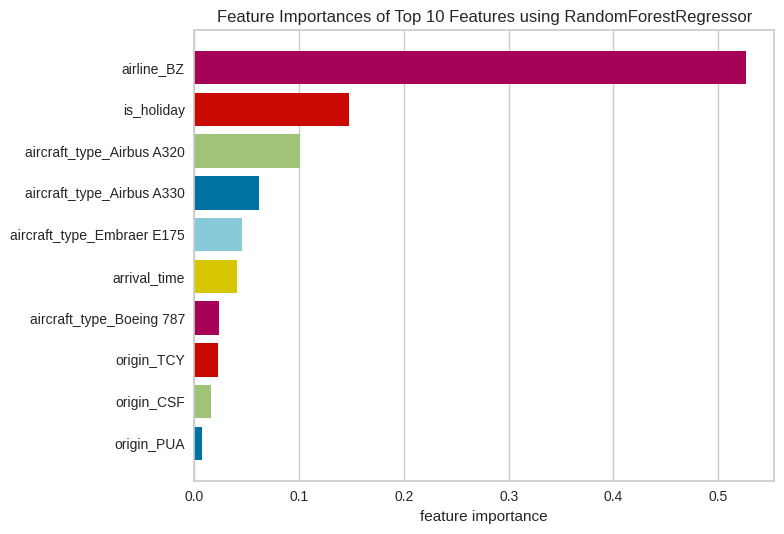

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [47]:
view = FeatureImportances(model_rf,
                          relative=False,
                          topn=10)
view.fit(x_train, y_train)
view.show()

In [48]:
feat_import = pd.DataFrame({'Features': x_train.columns,
              'Importances': model_rf.feature_importances_}).sort_values('Importances', ascending=False)
feat_import

,Features,Importances
4,airline_BZ,0.527021
2,is_holiday,0.147611
7,aircraft_type_Airbus A320,0.100811
8,aircraft_type_Airbus A330,0.061230
12,aircraft_type_Embraer E175,0.044931
1,arrival_time,0.040329
11,aircraft_type_Boeing 787,0.023195
20,origin_TCY,0.022551
15,origin_CSF,0.016040
19,origin_PUA,0.006901


In [49]:
results_df = pd.DataFrame(index=['MAE', 'RMSE', 'R2'])

model_rf_select_feats = RandomForestRegressor(random_state=7,
                                              max_depth=5)

for idx in [1, *range(5, 31, 5)]:

  x_train_select = x_train[feat_import['Features'].values[:idx]]
  x_val_select = x_test[feat_import['Features'].values[:idx]]

  model_rf_select_feats.fit(x_train_select, y_train)
  y_hat_select_feat = model_rf_select_feats.predict(x_val_select)

  results_df[idx] = list(calc_model_metrics(model_rf_select_feats,
                                            y_hat_select_feat,
                                            x_train_select,
                                            x_val_select,
                                            y_train,
                                            y_test,
                                            ignore_plots=True).values())

results_df

,1,5,10,15,20,25,30
MAE,15.0274,12.2214,11.1970,11.1848,11.1844,11.1836,11.1834
RMSE,18.8566,15.3125,13.9153,13.9087,13.9082,13.9071,13.9068
R2,0.3387,0.5639,0.6399,0.6402,0.6403,0.6403,0.6403


In [50]:
results_df = pd.DataFrame(index=['MAE', 'RMSE', 'R2'])

model_rf_select_feats = RandomForestRegressor(random_state=7,
                                              max_depth=5)

for idx in range(10, 16):

  x_train_select = x_train[feat_import['Features'].values[:idx]]
  x_val_select = x_test[feat_import['Features'].values[:idx]]

  model_rf_select_feats.fit(x_train_select, y_train)
  y_hat_select_feat = model_rf_select_feats.predict(x_val_select)

  results_df[idx] = list(calc_model_metrics(model_rf_select_feats,
                                            y_hat_select_feat,
                                            x_train_select,
                                            x_val_select,
                                            y_train,
                                            y_test,
                                            ignore_plots=True).values())

results_df

,10,11,12,13,14,15
MAE,11.1970,11.1955,11.1853,11.1852,11.1844,11.1848
RMSE,13.9153,13.9139,13.9101,13.9100,13.9095,13.9087
R2,0.6399,0.6400,0.6402,0.6402,0.6402,0.6402


In [51]:
X_selected_features = X[feat_import['Features'].values[:13]]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_selected_features, Y,
                                                    random_state=7)

### Fine tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 150, 200]
}

In [55]:
model_gscv = GridSearchCV(RandomForestRegressor(random_state=7),
                          param_grid=param_grid,
                          scoring='r2',
                          cv=KFold(n_splits=5,
                                   shuffle=True,
                                   random_state=7))
model_gscv.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=RandomForestRegressor(random_state=7),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [56]:
model_gscv.best_params_

{'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [57]:
y_hat_gscv = model_gscv.predict(x_test)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


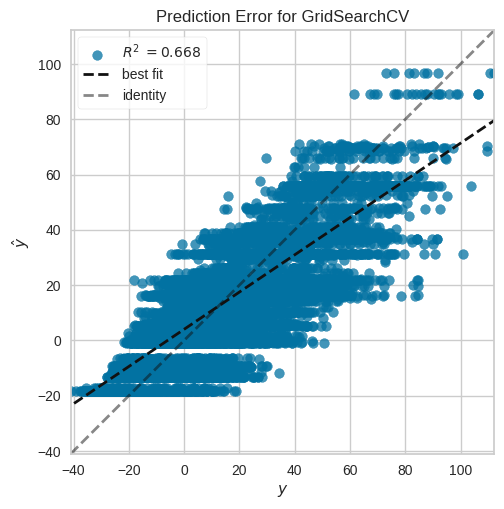

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


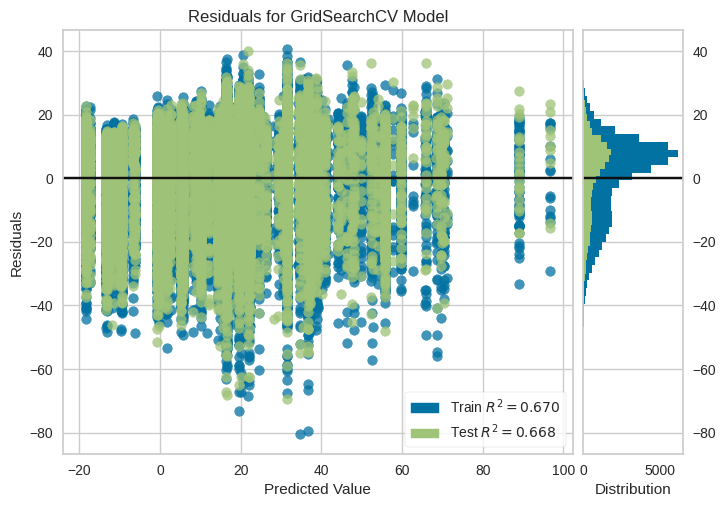

In [58]:
metrics_gscv = calc_model_metrics(model_gscv,
                   y_hat_gscv,
                   x_train,
                   x_test,
                   y_train,
                   y_test)

In [59]:
results_df['GridSearchCV'] = list(metrics_gscv.values())
results_df

,10,11,12,13,14,15,GridSearchCV
MAE,11.1970,11.1955,11.1853,11.1852,11.1844,11.1848,10.7331
RMSE,13.9153,13.9139,13.9101,13.9100,13.9095,13.9087,13.3659
R2,0.6399,0.6400,0.6402,0.6402,0.6402,0.6402,0.6678


## Model export

In [60]:
import pickle

In [61]:
with open('rand_forst.pkl', 'wb') as file:
  pickle.dump(model_gscv.best_estimator_, file)
  file.close()